In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r'/content/data.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dfc=df.copy()

In [8]:
df.shape

(4424, 37)

In [9]:
df

Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                         12  ...                                    0   
1                          3  ...                                    0   
2                         37  ...                                    0   
3                         37  ...                                    0   
4                         38  ...                                    0   
...                      ...  ...                                  ...   
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      37  ...                                    0   
4422                      37  ...                                    0   
4423                      37  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                            

In [10]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [11]:
df.duplicated().sum()

0

# EDA

In [12]:
df.columns=df.columns.str.lower()

### Converting Numerical Data into Categorical Data

In [13]:
m_s={1:'single',2:'married',3:'widower',4:'divorced',5:'facto-union',6:'legally-separated'}
df['marital status']=df['marital status'].map(m_s)

In [14]:
a_m={1:'1st phase-general contingent'
 ,2:'Ordinance No. 612/93'
 ,5:'1st phase - special contingent (Azores Island)'
 ,7:'Holders of other higher courses'
 ,10:'Ordinance No. 854-B/99'
 ,15:'International student (bachelor)'
 ,16:'1st phase - special contingent (Madeira Island)'
 ,17:'2nd phase - general contingent'
 ,18 :'3rd phase - general contingent'
 ,26 :'Ordinance No. 533-A/99, item b2 (Different Plan)'
 ,27 :"Ordinance No. 533-A/99, item b3 (Other Institution)"
 ,39 :"Over 23 years old"
 ,42 :"Transfer"
 ,43 :"Change of course"
 ,44 :"Technological specialization diploma holders"
 ,51 :'Change of institution/course'
 ,53 :'Short cycle diploma holders'
 ,57 :'Change of institution/course (International)'
}
df['application mode']=df['application mode'].map(a_m)

In [15]:
a_o = {
    0:"Application_0",
    1:"Application_1",
    2:"Application_2",
    3:"Application_3",
    4:"Application_4",
    5:"Application_5",
    6:"Application_6",
    7:"Application_7",
    8:"Application_8",
    9:"Application_9"
}
df['application order']=df['application order'].map(a_o)

In [16]:
cor ={33 : 'Biofuel Production Technologies',
171 : 'Animation and Multimedia Design',
8014 : 'Social Service (evening attendance)',
9003 : 'Agronomy',
9070 : 'Communication Design',
9085 : 'Veterinary Nursing',
9119 : 'Informatics Engineering',
9130 : 'Equinculture',
9147 :'Management',
9238 : 'Social Service',
9254 : 'Tourism',
9500 : 'Nursing',
9556 : 'Oral Hygiene',
9670 : 'Advertising and Marketing Management',
9773 : 'Journalism and Communication',
9853 : 'Basic Education',
9991 : 'Management (evening attendance)'}
df['course']=df['course'].map(cor)

In [17]:
p_q= {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}
df['previous qualification']=df['previous qualification'].map(p_q)

In [18]:
att = {1: 'daytime', 0 : 'evening'}
df['daytime/evening attendance\t']=df['daytime/evening attendance\t'].map(att)

In [19]:
m_q=education_levels = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-Professional Course",
    26: "7th Year of Schooling",
    27: "2nd Cycle of the General High School Course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th Year of Schooling",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read without Having a 4th Year of Schooling",
    37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}
df['mother\'s qualification']=df['mother\'s qualification'].map(m_q)

In [20]:
f_q=education_levels = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd Year Complementary High School Course",
    14: "10th Year of Schooling",
    18: "General Commerce Course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-Professional Course",
    25: "Complementary High School Course - Not Concluded",
    26: "7th Year of Schooling",
    27: "2nd Cycle of the General High School Course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th Year of Schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't Read or Write",
    36: "Can Read without Having a 4th Year of Schooling",
    37: "Basic Education 1st Cycle (4th/5th Year) or Equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological Specialization Course",
    40: "Higher Education - Degree (1st Cycle)",
    41: "Specialized Higher Studies Course",
    42: "Professional Higher Technical Course",
    43: "Higher Education - Master (2nd Cycle)",
    44: "Higher Education - Doctorate (3rd Cycle)"
}
df['father\'s qualification']=df['father\'s qualification'].map(f_q)

In [21]:
m_o=professions = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    122: "Health professionals",
    123: "Teachers",
    125: "Specialists in Information and Communication Technologies (ICT)",
    131: "Intermediate Level Science and Engineering Technicians and Professions",
    132: "Technicians and Professionals, of Intermediate Level of Health",
    134: "Intermediate Level Technicians from Legal, Social, Sports, Cultural and Similar Services",
    141: "Office Workers, Secretaries in General and Data Processing Operators",
    143: "Data, Accounting, Statistical, Financial Services and Registry-related Operators",
    144: "Other Administrative Support Staff",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers and the Like",
    171: "Skilled Construction Workers and the Like, Except Electricians",
    173: "Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like",
    175: "Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts",
    191: "Cleaning Workers",
    192: "Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry",
    193: "Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport",
    194: "Meal Preparation Assistants"
}
df['mother\'s occupation']=df['mother\'s occupation'].map(m_o)

In [22]:
nat = {1 :'Portuguese',
       2 :'German',
       6 : 'Spanish',
       11 : "Italian",
       13 : 'Dutch',
       14 : 'Englis',
       17 : 'Lithuanian',
       21 : 'Angolan',
       22 : 'Cape Verdean',
       24 : 'Guinean',
       25 : 'Mozambican',
       26 : 'Santomean',
       32 : 'Turkish',
       41 : 'Brazilian',
       62 : 'Romanian',
       100 : 'Moldova (Republic of)',
       101 : 'Mexican',
       103 : 'Ukrainian',
       105 : 'Russian',
       108 : 'Cuban',
       109 :'Colombian'
}
df['nacionality']=df['nacionality'].map(nat)

In [23]:
f_o=professions = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "Teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "Personal service workers",
    152: "Sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "Assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
}
df['father\'s occupation']=df['father\'s occupation'].map(f_o)

In [24]:
e_s_n = {1:'yes', 0: 'no'}
df['educational special needs']= df['educational special needs'].map(e_s_n)

dt = {1:'yes', 0: 'no'}
df['debtor']=df['debtor'].map(dt)

t_f_d = {1:'yes', 0: 'no'}
df['tuition fees up to date']=df['tuition fees up to date'].map(t_f_d)

grd = {1:'male', 0: 'female'}
df['gender']=df['gender'].map(grd)

schol = {1:'yes', 0: 'no'}
df['scholarship holder']=df['scholarship holder'].map(schol)

intn = {1:'yes', 0: 'no'}
df['international']=df['international'].map(intn)

### Null Values

In [25]:
df.isnull().sum()

marital status                                    0
application mode                                  0
application order                                 0
course                                            0
daytime/evening attendance\t                      0
previous qualification                            0
previous qualification (grade)                    0
nacionality                                       0
mother's qualification                            0
father's qualification                            0
mother's occupation                               0
father's occupation                               0
admission grade                                   0
displaced                                         0
educational special needs                         0
debtor                                            0
tuition fees up to date                           0
gender                                            0
scholarship holder                                0
age at enrol

### Duplicates

In [26]:
df[df.duplicated()]

Empty DataFrame
Columns: [marital status, application mode, application order, course, daytime/evening attendance	, previous qualification, previous qualification (grade), nacionality, mother's qualification, father's qualification, mother's occupation, father's occupation, admission grade, displaced, educational special needs, debtor, tuition fees up to date, gender, scholarship holder, age at enrollment, international, curricular units 1st sem (credited), curricular units 1st sem (enrolled), curricular units 1st sem (evaluations), curricular units 1st sem (approved), curricular units 1st sem (grade), curricular units 1st sem (without evaluations), curricular units 2nd sem (credited), curricular units 2nd sem (enrolled), curricular units 2nd sem (evaluations), curricular units 2nd sem (approved), curricular units 2nd sem (grade), curricular units 2nd sem (without evaluations), unemployment rate, inflation rate, gdp, target]
Index: []

[0 rows x 37 columns]

### Column Name Correction

In [27]:
column_names_mapping = {
    'marital status': 'Marital_Status',
    'application mode': 'Application_Mode',
    'application order': 'Application_Order',
    'course': 'Course',
    'daytime/evening attendance\t': 'Daytime/Evening Attendance',
    'previous qualification': 'Previous_Qualification',
    'previous qualification (grade)': 'Previous_Qualification_Grade',
    'nacionality': 'Nationality',
    'mother\'s qualification': "Mother's_Qualification",
    'father\'s qualification': "Father's_Qualification",
    'mother\'s occupation': "Mother's_Occupation",
    'father\'s occupation': "Father's_Occupation",
    'admission grade': 'Admission_Grade',
    'displaced': 'Displaced',
    'educational special needs': 'Educational_Special_Needs',
    'debtor': 'Debtor',
    'tuition fees up to date': 'Tuition_Fees_Up_to_Date',
    'gender': 'Gender',
    'scholarship holder': 'Scholarship_Holder',
    'age at enrollment': 'Age_at_Enrollment',
    'international': 'International',
    'curricular units 1st sem (credited)': 'Curricular_Units_1st_Semester_(Credited)',
    'curricular units 1st sem (enrolled)': 'Curricular_Units_1st_Semester_(Enrolled)',
    'curricular units 1st sem (evaluations)': 'Curricular_Units_1st_Semester_(Evaluations)',
    'curricular units 1st sem (approved)': 'Curricular_Units_1st_Semester_(Approved)',
    'curricular units 1st sem (grade)': 'Curricular_Units_1st_Semester_(Grade)',
    'curricular units 1st sem (without evaluations)': 'Curricular_Units_1st_Semester_(Without_Evaluations)',
    'curricular units 2nd sem (credited)': 'Curricular_Units_2nd_Semester_(Credited)',
    'curricular units 2nd sem (enrolled)': 'Curricular_Units_2nd_Semester_(Enrolled)',
    'curricular units 2nd sem (evaluations)': 'Curricular_Units_2nd_Semester_(Evaluations)',
    'curricular units 2nd sem (approved)': 'Curricular_Units_2nd_Semester_(Approved)',
    'curricular units 2nd sem (grade)': 'Curricular_Units_2nd_Semester_(Grade)',
    'curricular units 2nd sem (without evaluations)': 'Curricular_Units_2nd_Semester_(Without Evaluations)',
    'unemployment rate': 'Unemployment_Rate(i%)',
    'inflation rate': 'Inflation_Rate(%)',
    'gdp': 'GDP',
    'target': 'Target'
}

df.rename(columns=column_names_mapping,inplace=True)
df.columns=df.columns.str.lower()

In [28]:
df

marital_status                  application_mode application_order  \
0            single    2nd phase - general contingent     Application_5   
1            single  International student (bachelor)     Application_1   
2            single      1st phase-general contingent     Application_5   
3            single    2nd phase - general contingent     Application_2   
4           married                 Over 23 years old     Application_1   
...             ...                               ...               ...   
4419         single      1st phase-general contingent     Application_6   
4420         single      1st phase-general contingent     Application_2   
4421         single      1st phase-general contingent     Application_1   
4422         single      1st phase-general contingent     Application_1   
4423         single            Ordinance No. 854-B/99     Application_1   

                                   course daytime/evening attendance  \
0         Animation and Multimedia Design                    daytime   
1                                 Tourism                    daytime   
2                    Communication Design                    daytime   
3            Journalism and Communication                    daytime   
4     Social Service (evening attendance)                    evening   
...                                   ...                        ...   
4419         Journalism and Communication                    daytime   
4420         Journalism and Communication                    daytime   
4421                              Nursing                    daytime   
4422                           Management                    daytime   
4423         Journalism and Communication                    daytime   

     previous_qualification  previous_qualification_grade   nationality  \
0       Secondary education                         122.0    Portuguese   
1       Secondary education                         160.0    Portuguese   
2       Secondary education                         122.0    Portuguese   
3       Secondary education                         122.0    Portuguese   
4       Secondary education                         100.0    Portuguese   
...                     ...                           ...           ...   
4419    Secondary education                         125.0    Portuguese   
4420    Secondary education                         120.0       Russian   
4421    Secondary education                         154.0    Portuguese   
4422    Secondary education                         180.0    Portuguese   
4423    Secondary education                         152.0  Cape Verdean   

                                 mother's_qualification  \
0     Basic Education 3rd Cycle (9th/10th/11th Year)...   
1     Secondary Education - 12th Year of Schooling o...   
2     Basic Education 1st Cycle (4th/5th Year) or Eq...   
3     Basic Education 2nd Cycle (6th/7th/8th Year) o...   
4     Basic Education 1st Cycle (4th/5th Year) or Eq...   
...                                                 ...   
4419  Secondary Education - 12th Year of Schooling o...   
4420  Secondary Education - 12th Year of Schooling o...   
4421  Basic Education 1st Cycle (4th/5th Year) or Eq...   
4422  Basic Education 1st Cycle (4th/5th Year) or Eq...   
4423  Basic Education 2nd Cycle (6th/7th/8th Year) o...   

                                 father's_qualification  ...  \
0                        Other - 11th Year of Schooling  ...   
1                             Higher Education - Degree  ...   
2     Basic Education 1st Cycle (4th/5th Year) or Eq...  ...   
3     Basic Education 1st Cycle (4th/5th Year) or Eq...  ...   
4     Basic Education 2nd Cycle (6th/7th/8th Year) o...  ...   
...                                                 ...  ...   
4419  Secondary Education - 12th Year of Schooling o...  ...   
4420  Secondary Education - 12th Year of Schooling o...  ...   
4421  Basic Education 1st Cycle (4th/5th Year) or Eq.

### Seperation Numerical and Categorical Columns

In [29]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [30]:
numerical_columns

Index(['previous_qualification_grade', 'admission_grade', 'displaced',
       'age_at_enrollment', 'curricular_units_1st_semester_(credited)',
       'curricular_units_1st_semester_(enrolled)',
       'curricular_units_1st_semester_(evaluations)',
       'curricular_units_1st_semester_(approved)',
       'curricular_units_1st_semester_(grade)',
       'curricular_units_1st_semester_(without_evaluations)',
       'curricular_units_2nd_semester_(credited)',
       'curricular_units_2nd_semester_(enrolled)',
       'curricular_units_2nd_semester_(evaluations)',
       'curricular_units_2nd_semester_(approved)',
       'curricular_units_2nd_semester_(grade)',
       'curricular_units_2nd_semester_(without evaluations)',
       'unemployment_rate(i%)', 'inflation_rate(%)', 'gdp'],
      dtype='object')

In [31]:
categorical_columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening attendance', 'previous_qualification', 'nationality',
       'mother's_qualification', 'father's_qualification',
       'mother's_occupation', 'father's_occupation',
       'educational_special_needs', 'debtor', 'tuition_fees_up_to_date',
       'gender', 'scholarship_holder', 'international', 'target'],
      dtype='object')

# Univatiate Analysis

## Histograms

In [32]:
"""for column in numerical_columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()"""


"for column in numerical_columns:\n    sns.histplot(df[column], kde=True)\n    plt.title(f'Histogram of {column}')\n    plt.show()"

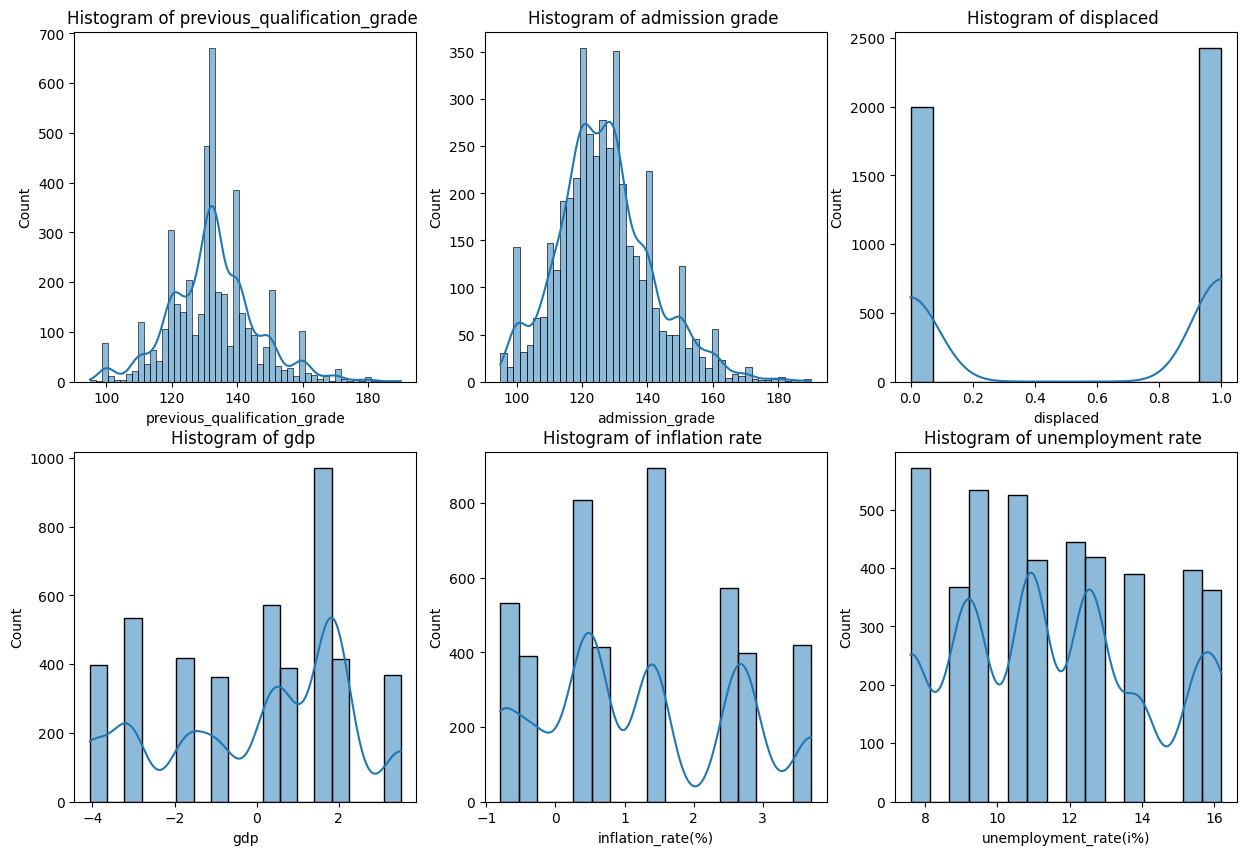

In [33]:
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
sns.histplot(df['previous_qualification_grade'], kde=True)
plt.title(f'Histogram of previous_qualification_grade ')

plt.subplot(2,3,2)
sns.histplot(df['admission_grade'], kde=True)
plt.title(f'Histogram of admission grade ')

plt.subplot(2,3,3)
sns.histplot(df['displaced'], kde=True)
plt.title(f'Histogram of displaced ')

plt.subplot(2,3,4)
sns.histplot(df['gdp'], kde=True)
plt.title(f'Histogram of gdp ')


plt.subplot(2,3,5)
sns.histplot(df['inflation_rate(%)'], kde=True)
plt.title(f'Histogram of inflation rate ')

plt.subplot(2,3,6)
sns.histplot(df['unemployment_rate(i%)'], kde=True)
plt.title(f'Histogram of unemployment rate ')


plt.show()

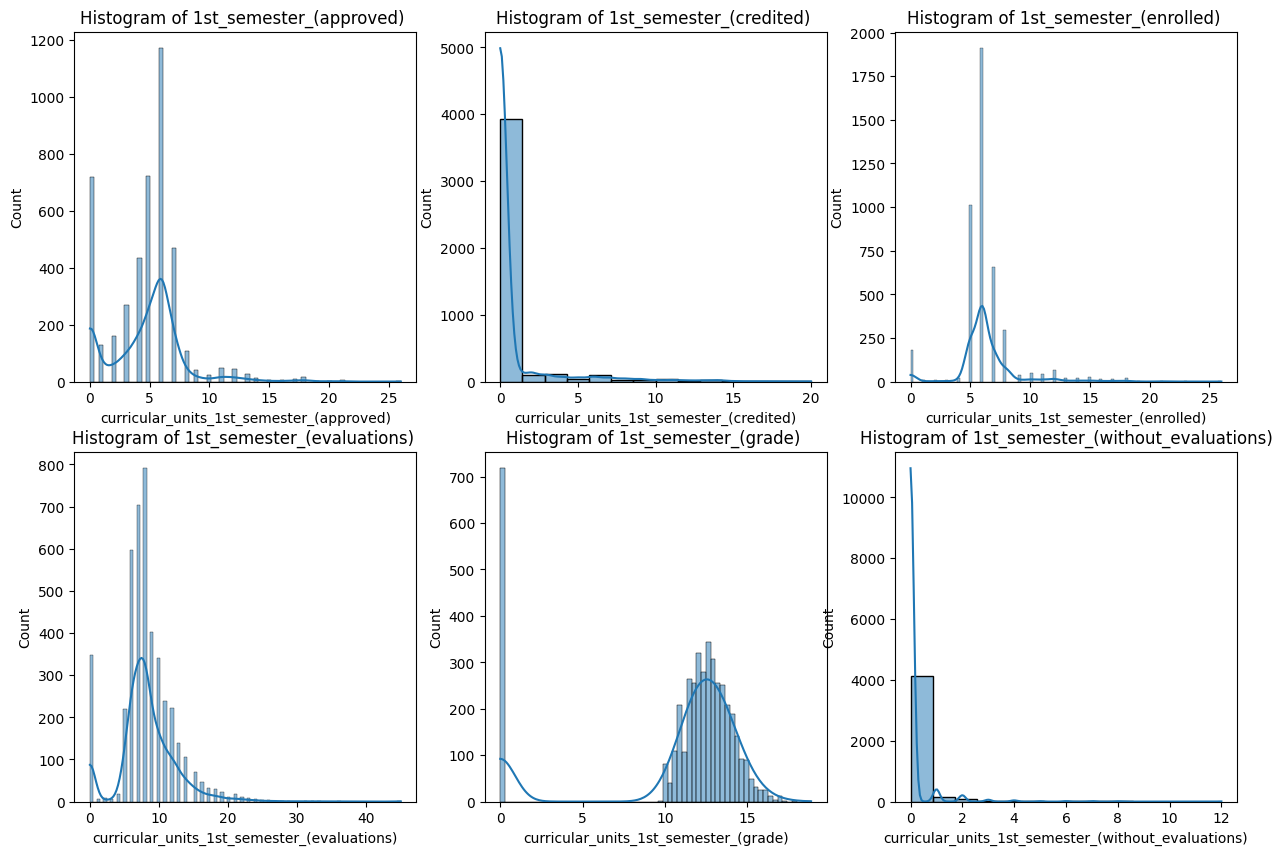

In [34]:
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
sns.histplot(df['curricular_units_1st_semester_(approved)'], kde=True)
plt.title(f'Histogram of 1st_semester_(approved) ')

plt.subplot(2,3,2)
sns.histplot(df['curricular_units_1st_semester_(credited)'], kde=True)
plt.title(f'Histogram of 1st_semester_(credited) ')

plt.subplot(2,3,3)
sns.histplot(df['curricular_units_1st_semester_(enrolled)'], kde=True)
plt.title(f'Histogram of 1st_semester_(enrolled) ')

plt.subplot(2,3,4)
sns.histplot(df['curricular_units_1st_semester_(evaluations)'], kde=True)
plt.title(f'Histogram of 1st_semester_(evaluations) ')


plt.subplot(2,3,5)
sns.histplot(df['curricular_units_1st_semester_(grade)'], kde=True)
plt.title(f'Histogram of 1st_semester_(grade) ')

plt.subplot(2,3,6)
sns.histplot(df['curricular_units_1st_semester_(without_evaluations)'], kde=True)
plt.title(f'Histogram of 1st_semester_(without_evaluations)')


plt.show()

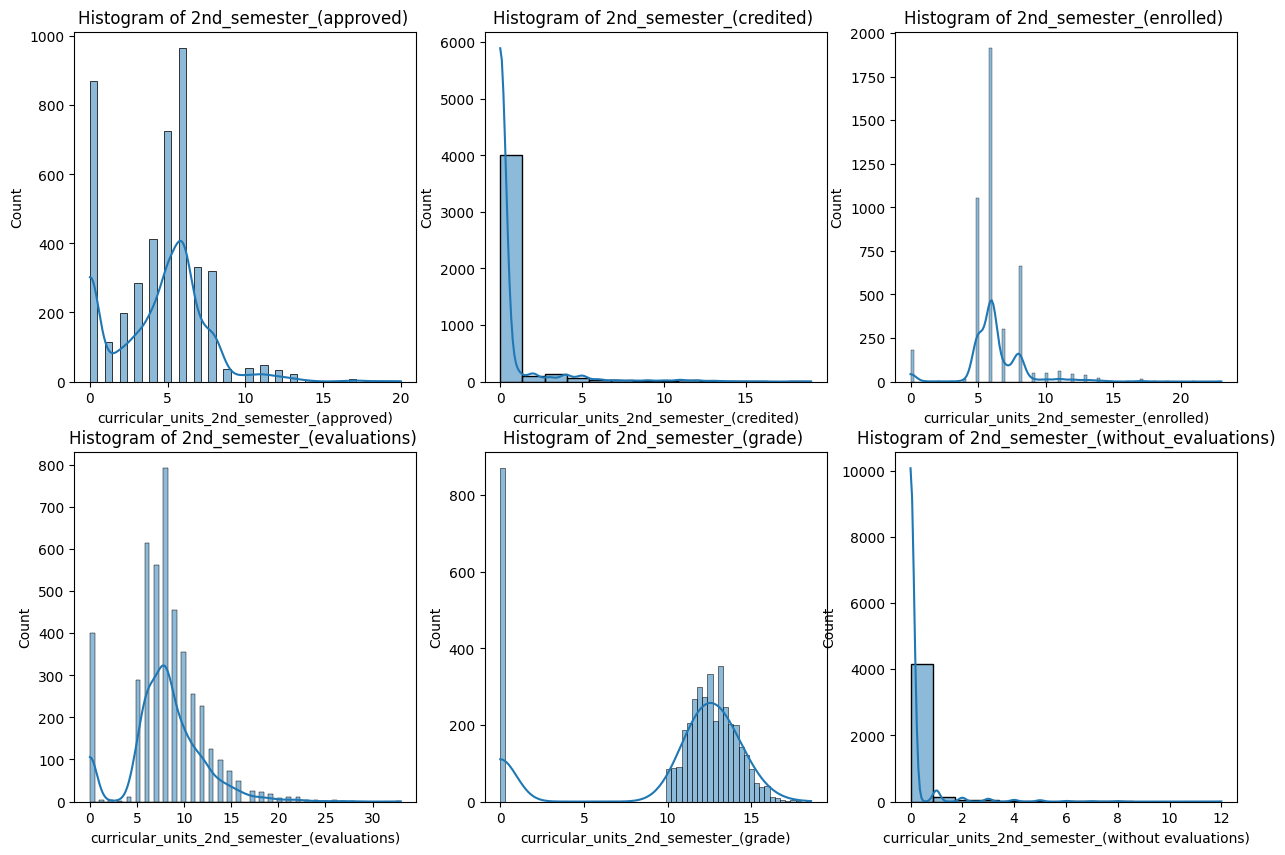

In [35]:
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
sns.histplot(df['curricular_units_2nd_semester_(approved)'], kde=True)
plt.title(f'Histogram of 2nd_semester_(approved) ')

plt.subplot(2,3,2)
sns.histplot(df['curricular_units_2nd_semester_(credited)'], kde=True)
plt.title(f'Histogram of 2nd_semester_(credited) ')

plt.subplot(2,3,3)
sns.histplot(df['curricular_units_2nd_semester_(enrolled)'], kde=True)
plt.title(f'Histogram of 2nd_semester_(enrolled) ')

plt.subplot(2,3,4)
sns.histplot(df['curricular_units_2nd_semester_(evaluations)'], kde=True)
plt.title(f'Histogram of 2nd_semester_(evaluations) ')


plt.subplot(2,3,5)
sns.histplot(df['curricular_units_2nd_semester_(grade)'], kde=True)
plt.title(f'Histogram of 2nd_semester_(grade) ')

plt.subplot(2,3,6)
sns.histplot(df['curricular_units_2nd_semester_(without evaluations)'], kde=True)
plt.title(f'Histogram of 2nd_semester_(without_evaluations)')


plt.show()

## Count Plot

In [36]:
"""for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()"""


"for column in categorical_columns:\n    sns.countplot(data=df, x=column)\n    plt.title(f'Count Plot of {column}')\n    plt.xticks(rotation=45)\n    plt.show()"

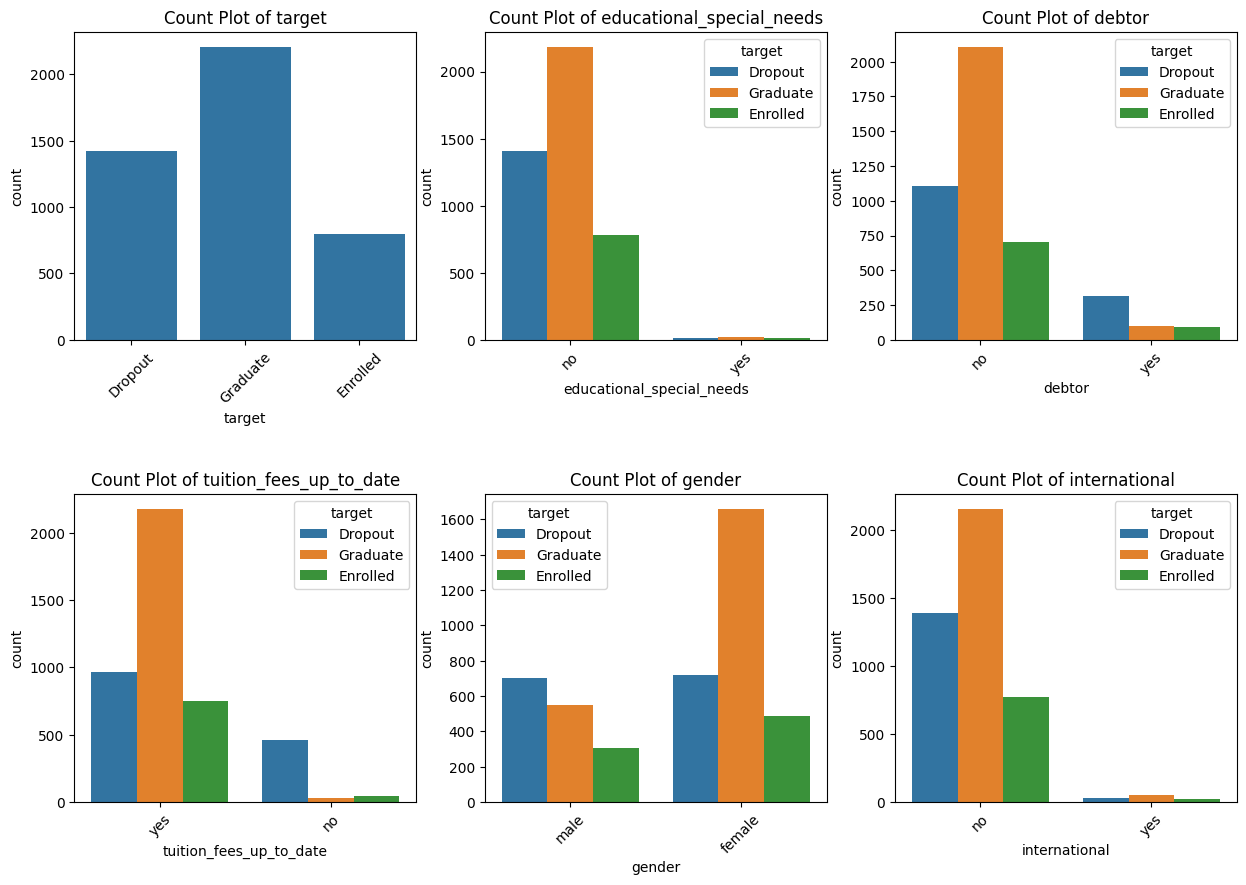

In [37]:
plt.figure(figsize=(15, 10))


plt.subplot(2,3,1)
sns.countplot(data=df, x='target')
plt.title(f'Count Plot of target')
plt.xticks(rotation=45)


plt.subplot(2,3,2)
sns.countplot(data=df, x='educational_special_needs',hue='target')
plt.title(f'Count Plot of educational_special_needs')
plt.xticks(rotation=45)

plt.subplot(2,3,3)
sns.countplot(data=df, x='debtor',hue='target')
plt.title(f'Count Plot of debtor')
plt.xticks(rotation=45)

plt.subplot(2,3,4)
sns.countplot(data=df, x="tuition_fees_up_to_date",hue='target')
plt.title(f"Count Plot of tuition_fees_up_to_date")
plt.xticks(rotation=45)


plt.subplot(2,3,5)
sns.countplot(data=df, x='gender',hue='target')
plt.title(f'Count Plot of gender')
plt.xticks(rotation=45)

plt.subplot(2,3,6)
sns.countplot(data=df, x='international',hue='target')
plt.title(f'Count Plot of international')
plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.5)

plt.show()

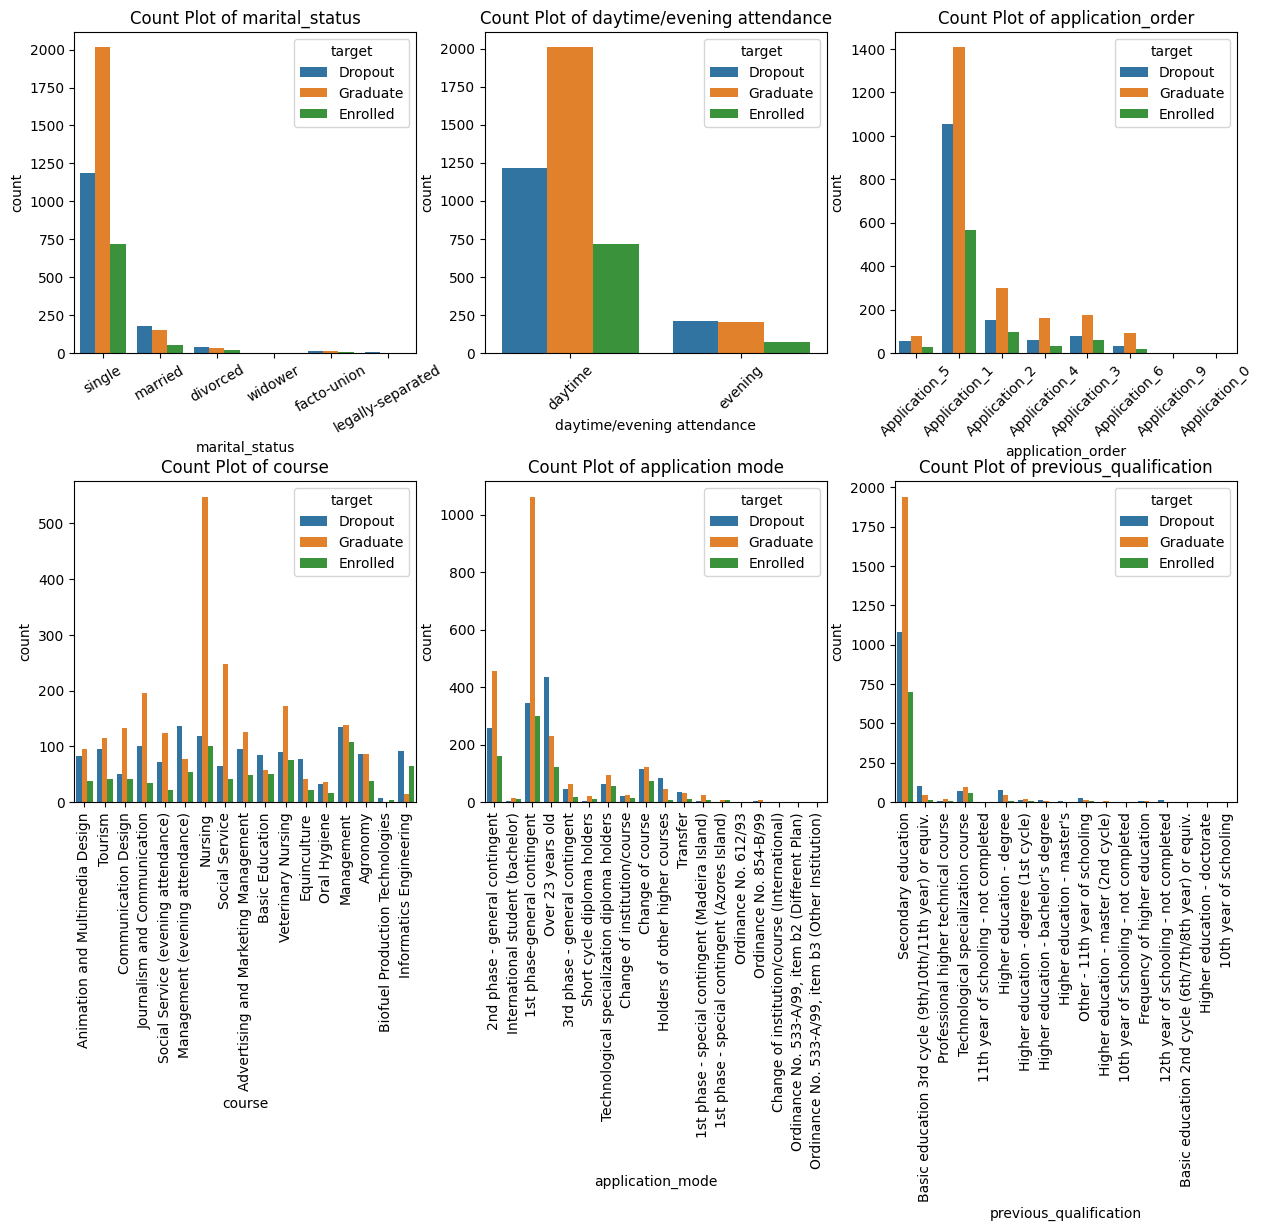

In [38]:
plt.figure(figsize=(15, 10))


plt.subplot(2,3,1)
sns.countplot(data=df, x='marital_status',hue='target')
plt.title(f'Count Plot of marital_status')
plt.xticks(rotation=30)


plt.subplot(2,3,2)
sns.countplot(data=df, x='daytime/evening attendance',hue='target')
plt.title(f'Count Plot of daytime/evening attendance')
plt.xticks(rotation=45)

plt.subplot(2,3,3)
sns.countplot(data=df, x='application_order',hue='target')
plt.title(f'Count Plot of application_order')
plt.xticks(rotation=45)

plt.subplot(2,3,4)
sns.countplot(data=df, x='course',hue='target')
plt.title(f'Count Plot of course')
plt.xticks(rotation=90)


plt.subplot(2,3,5)
sns.countplot(data=df, x='application_mode',hue='target')
plt.title(f'Count Plot of application mode')
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(data=df, x='previous_qualification',hue='target')
plt.title(f'Count Plot of previous_qualification')
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.4)

plt.show()

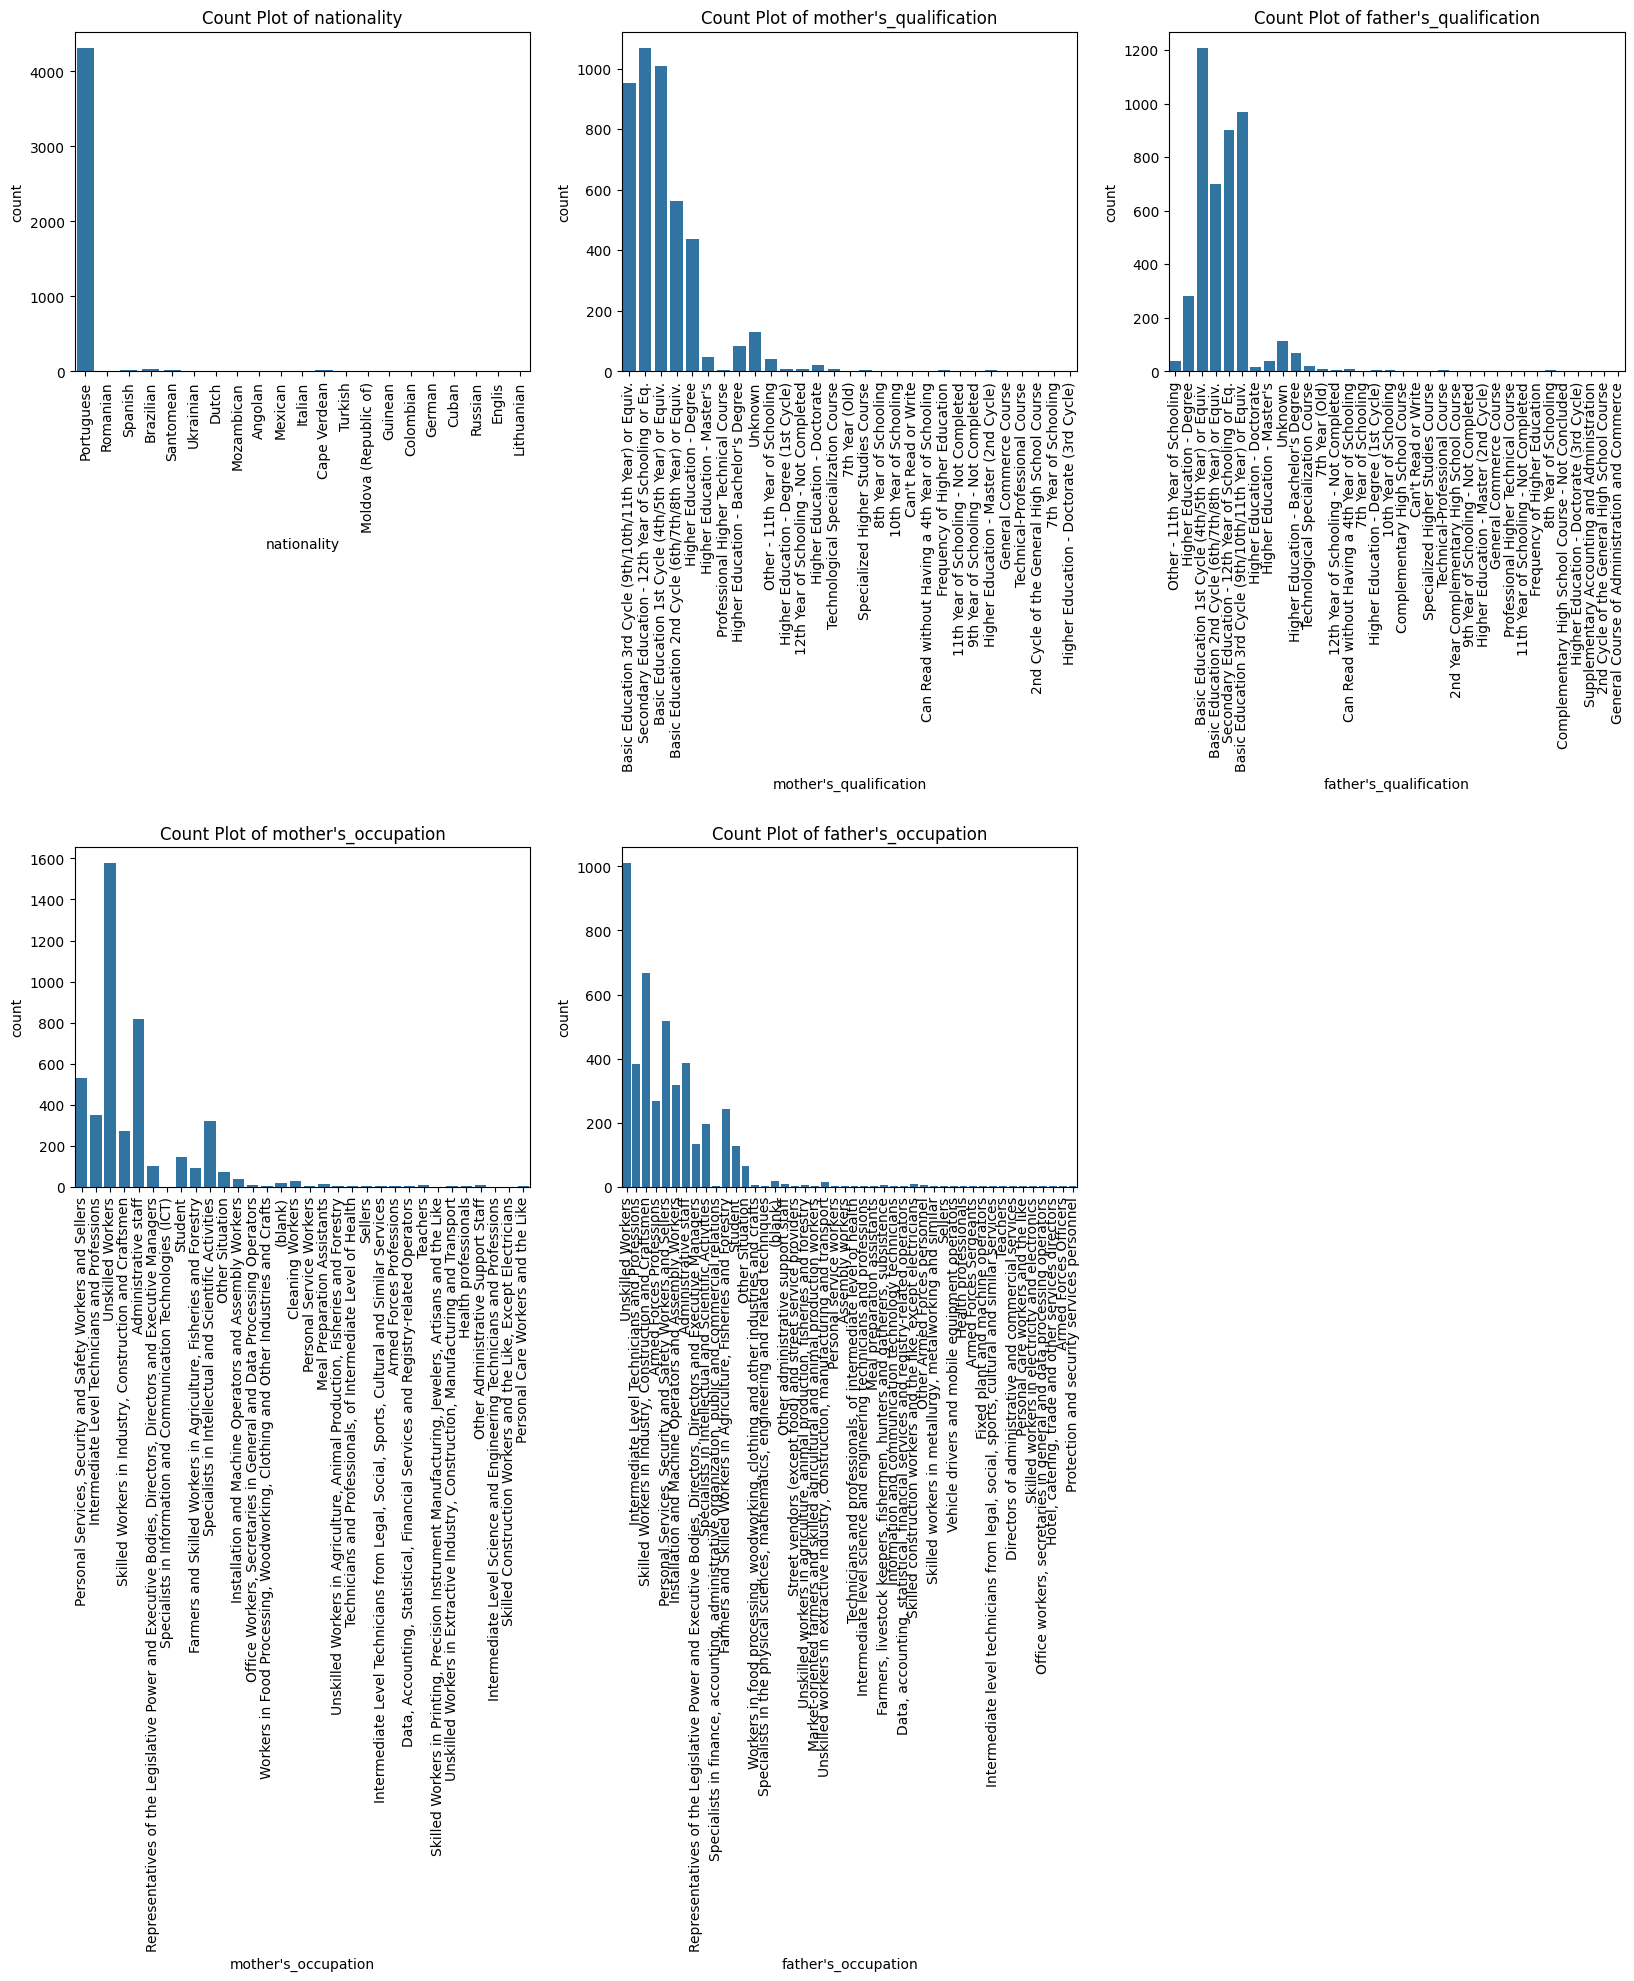

In [39]:
plt.figure(figsize=(20, 15))


plt.subplot(2,3,1)
sns.countplot(data=df, x='nationality')
plt.title(f'Count Plot of nationality')
plt.xticks(rotation=90)


plt.subplot(2,3,2)
sns.countplot(data=df, x="mother's_qualification")
plt.title(f"Count Plot of mother's_qualification")
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(data=df, x="father's_qualification")
plt.title(f"Count Plot of father's_qualification")
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(data=df, x="mother's_occupation")
plt.title(f"Count Plot of mother's_occupation")
plt.xticks(rotation=90)


plt.subplot(2,3,5)
sns.countplot(data=df, x="father's_occupation")
plt.title(f"Count Plot of father's_occupation")
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=1.4)

plt.show()

## Pie-plot

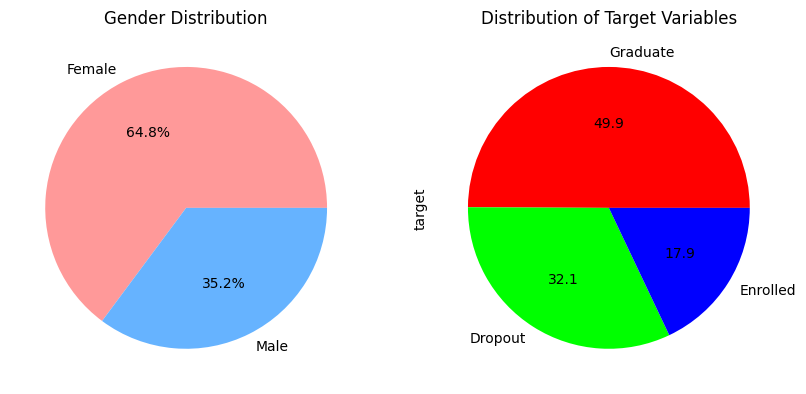

In [40]:
gn = df['gender'].value_counts()
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(gn, labels=['Female', 'Male'], autopct='%1.1f%%', colors=['#FF9999', '#66B3FF'])
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
colors = ["#FF0000", "#00FF00", "#0000FF"]
df['target'].value_counts().plot.pie(autopct='%.1f', title='Distribution of Target Variables', colors=colors)

plt.show()

# Bivariate Analysis

## Pairplot

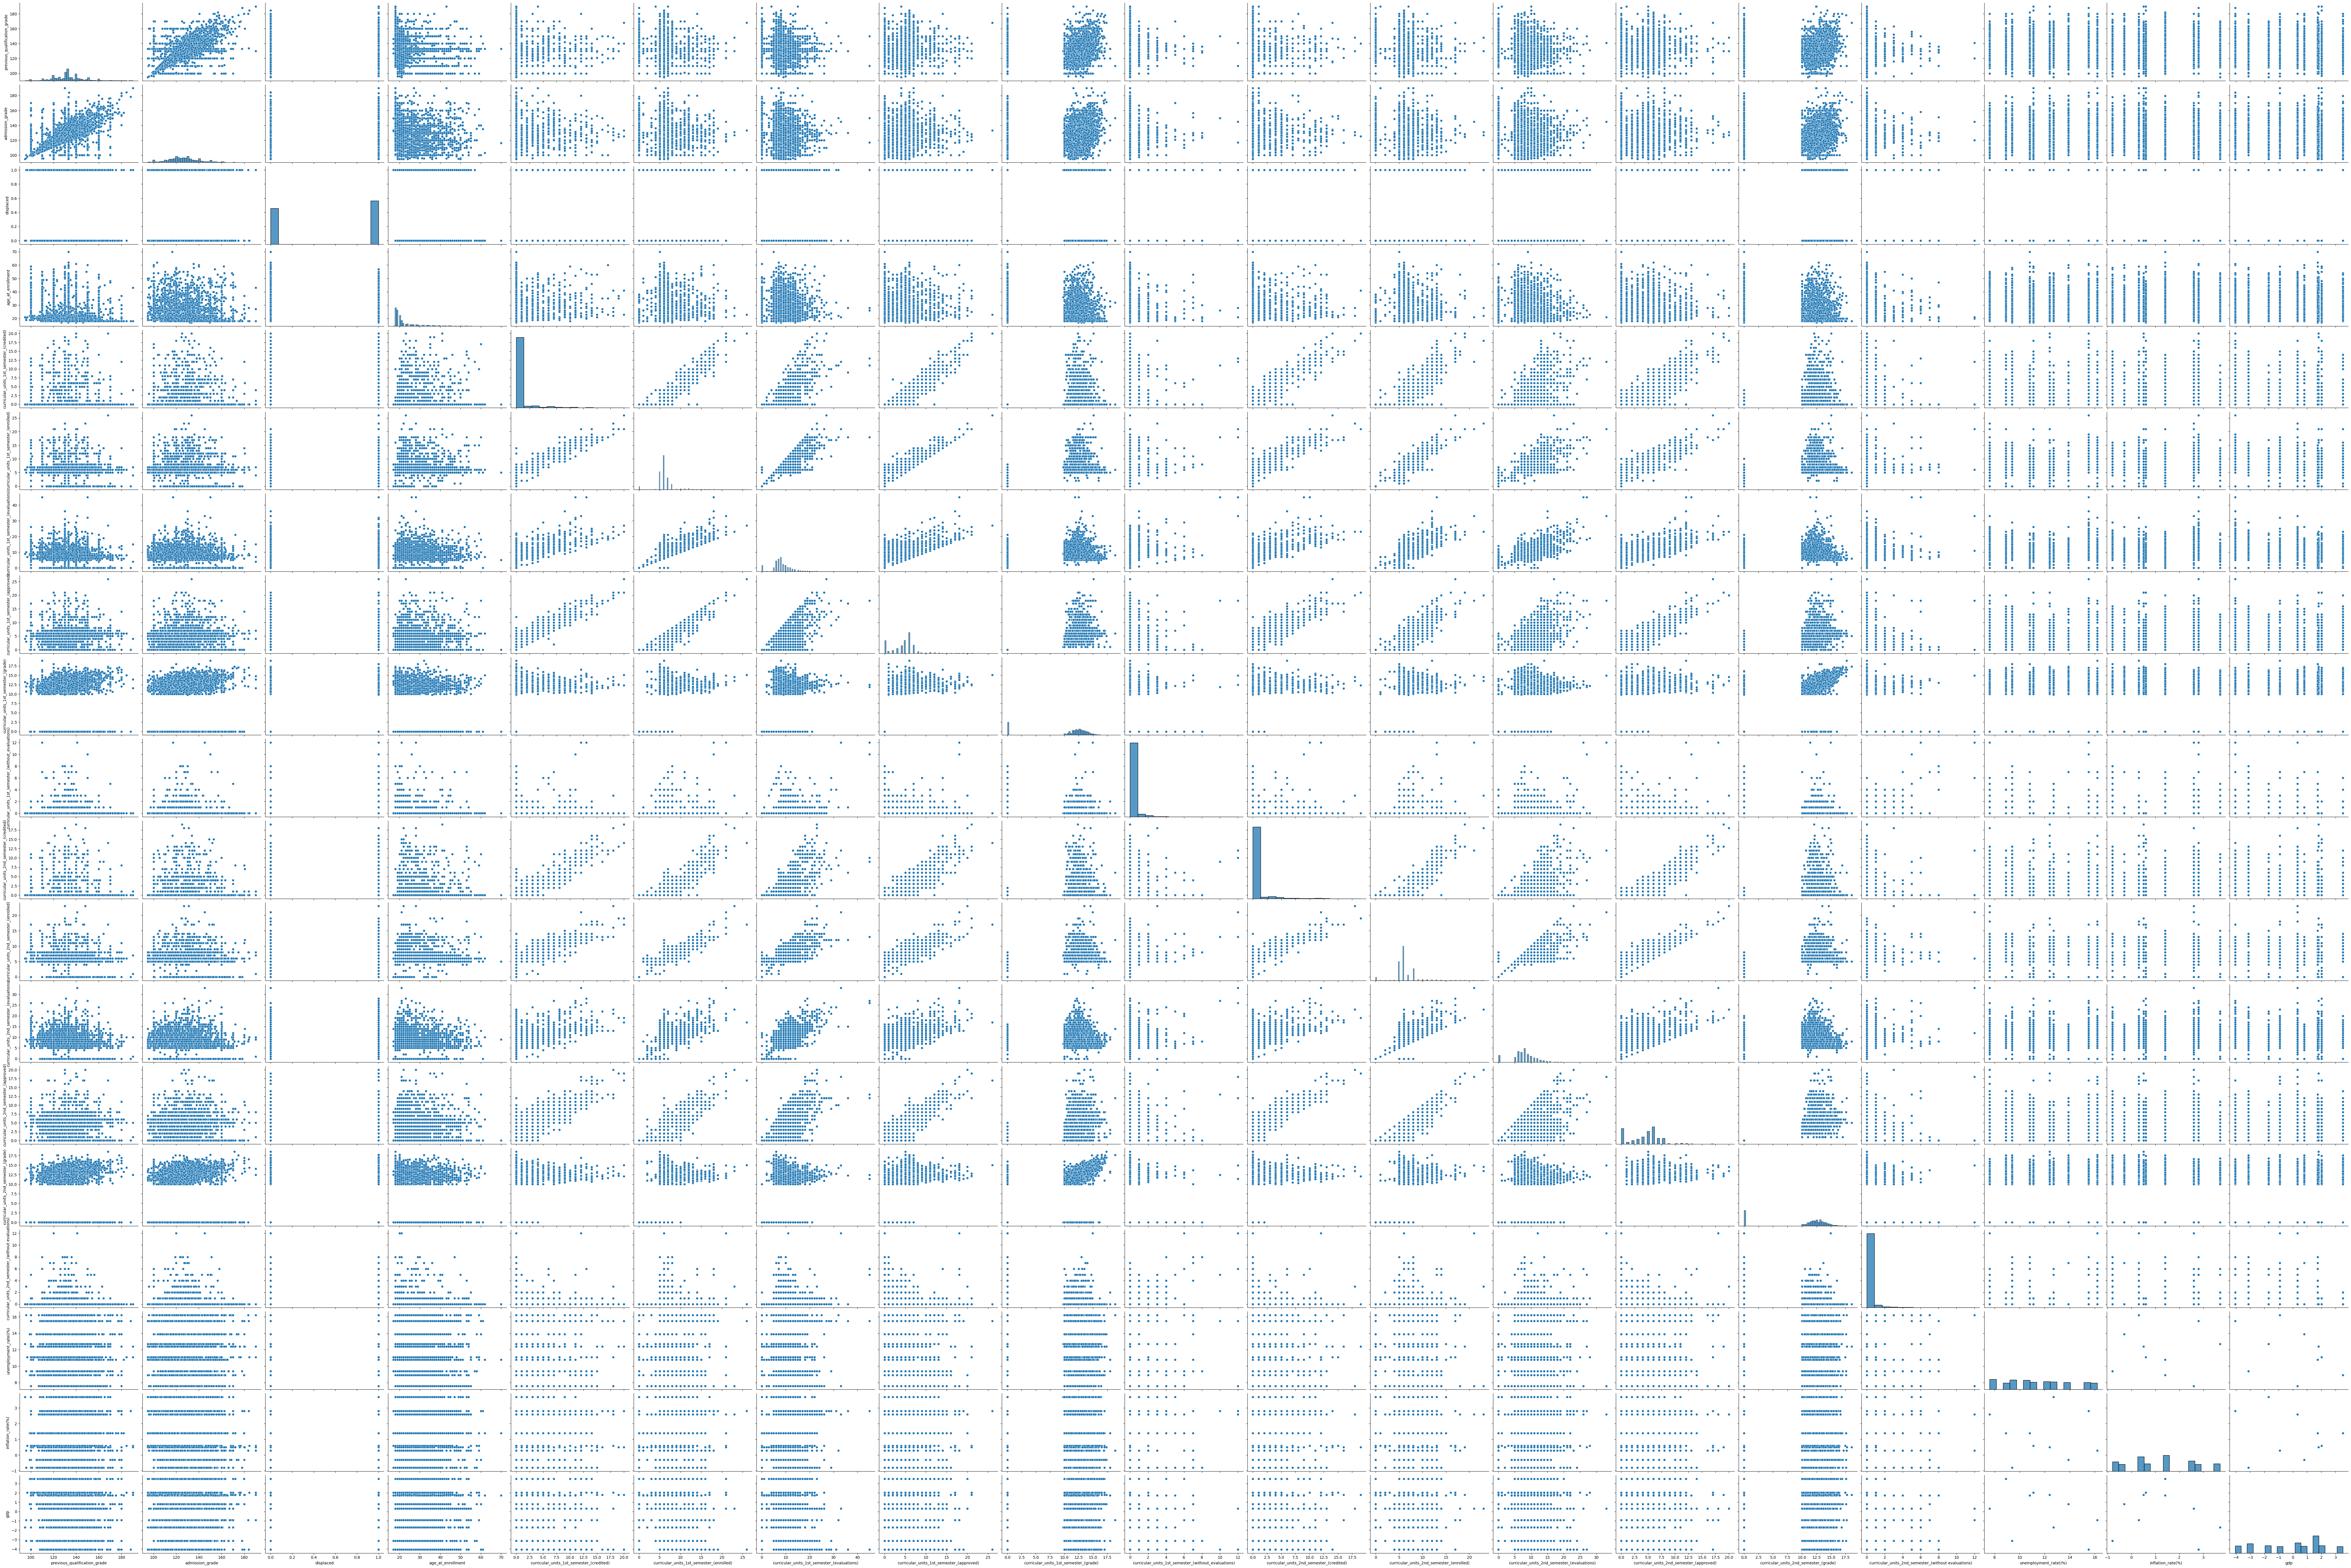

In [41]:
sns.pairplot(df[numerical_columns],height=3, aspect=1.5)
plt.show()

## Box plot

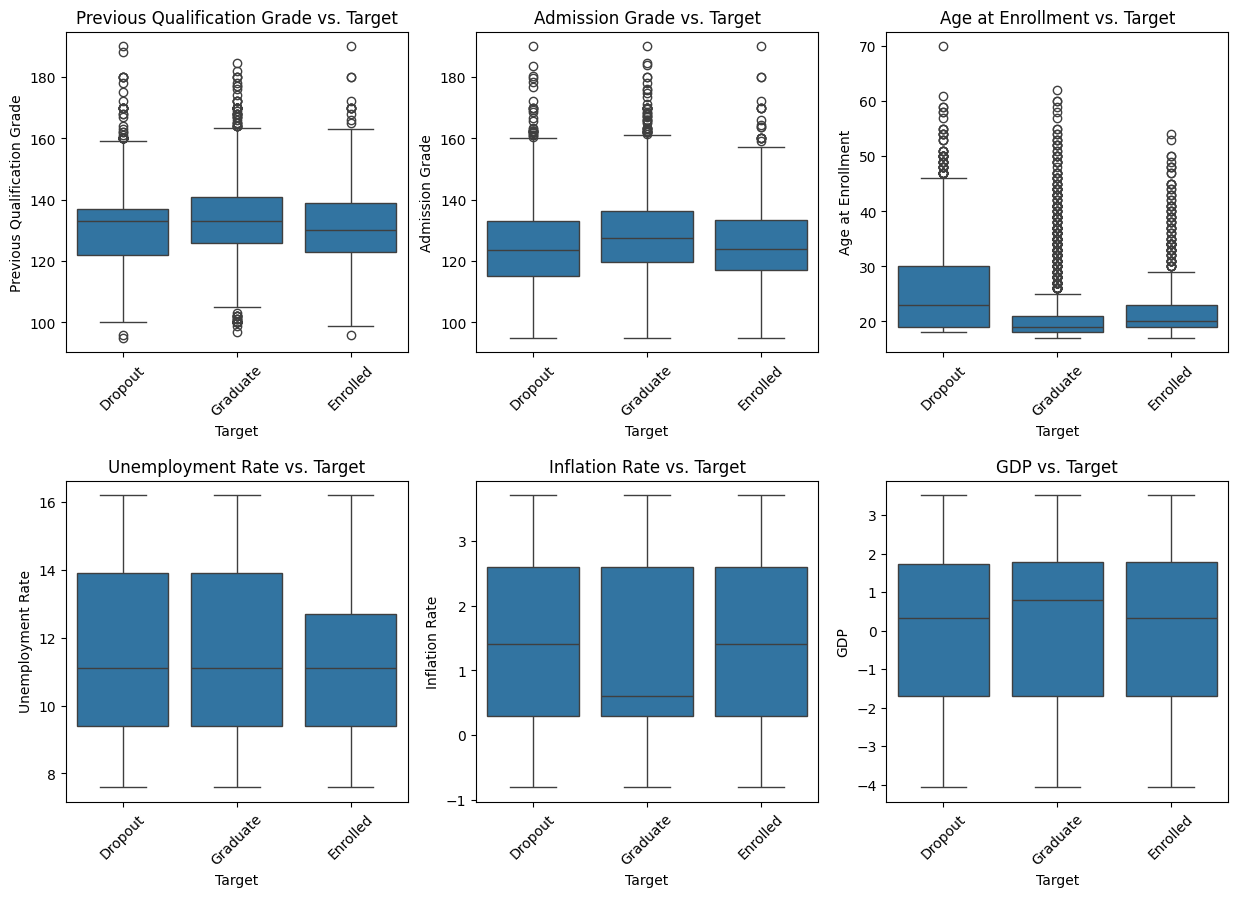

In [42]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(data=df, x='target', y='previous_qualification_grade')
plt.title('Previous Qualification Grade vs. Target')
plt.xlabel('Target')
plt.ylabel('Previous Qualification Grade')
plt.xticks(rotation=45)

plt.subplot(2,3,2)
sns.boxplot(data=df, x='target', y='admission_grade')
plt.title('Admission Grade vs. Target')
plt.xlabel('Target')
plt.ylabel('Admission Grade')
plt.xticks(rotation=45)

plt.subplot(2,3,3)
sns.boxplot(data=df, x='target', y='age_at_enrollment')
plt.title('Age at Enrollment vs. Target')
plt.xlabel('Target')
plt.ylabel('Age at Enrollment')
plt.xticks(rotation=45)

plt.subplot(2,3,4)
sns.boxplot(data=df, x='target', y='unemployment_rate(i%)')
plt.title('Unemployment Rate vs. Target')
plt.xlabel('Target')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)

plt.subplot(2,3,5)
sns.boxplot(data=df, x='target', y='inflation_rate(%)')
plt.title('Inflation Rate vs. Target')
plt.xlabel('Target')
plt.ylabel('Inflation Rate')
plt.xticks(rotation=45)

plt.subplot(2,3,6)
sns.boxplot(data=df, x='target', y='gdp')
plt.title('GDP vs. Target')
plt.xlabel('Target')
plt.ylabel('GDP')
plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.4)


plt.show()

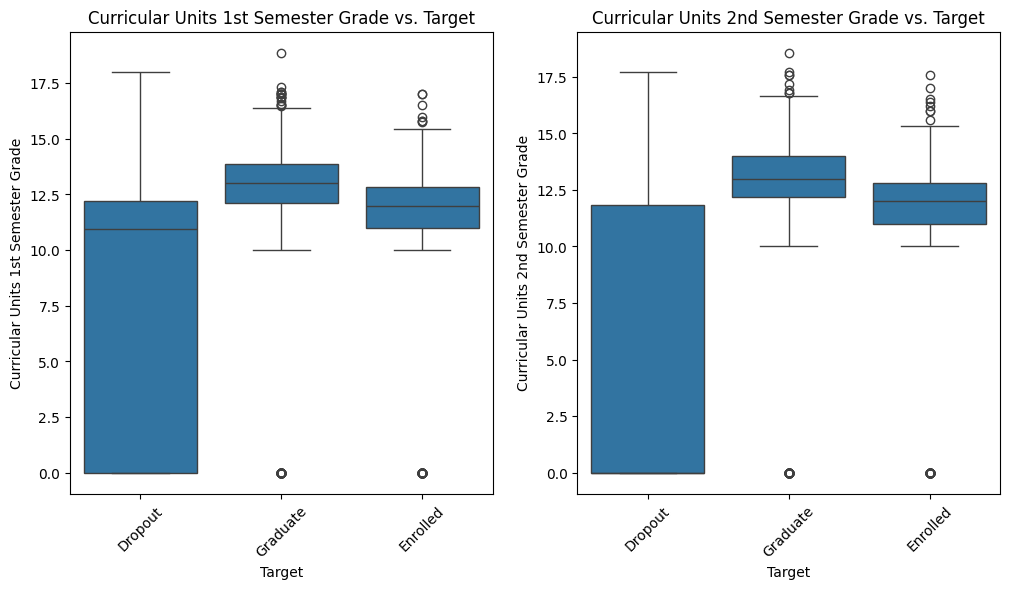

In [43]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='target', y='curricular_units_1st_semester_(grade)')
plt.title('Curricular Units 1st Semester Grade vs. Target')
plt.xlabel('Target')
plt.ylabel('Curricular Units 1st Semester Grade')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='target', y='curricular_units_2nd_semester_(grade)')
plt.title('Curricular Units 2nd Semester Grade vs. Target')
plt.xlabel('Target')
plt.ylabel('Curricular Units 2nd Semester Grade')
plt.xticks(rotation=45)

plt.show()

## Heatmaps and Contigency Tables

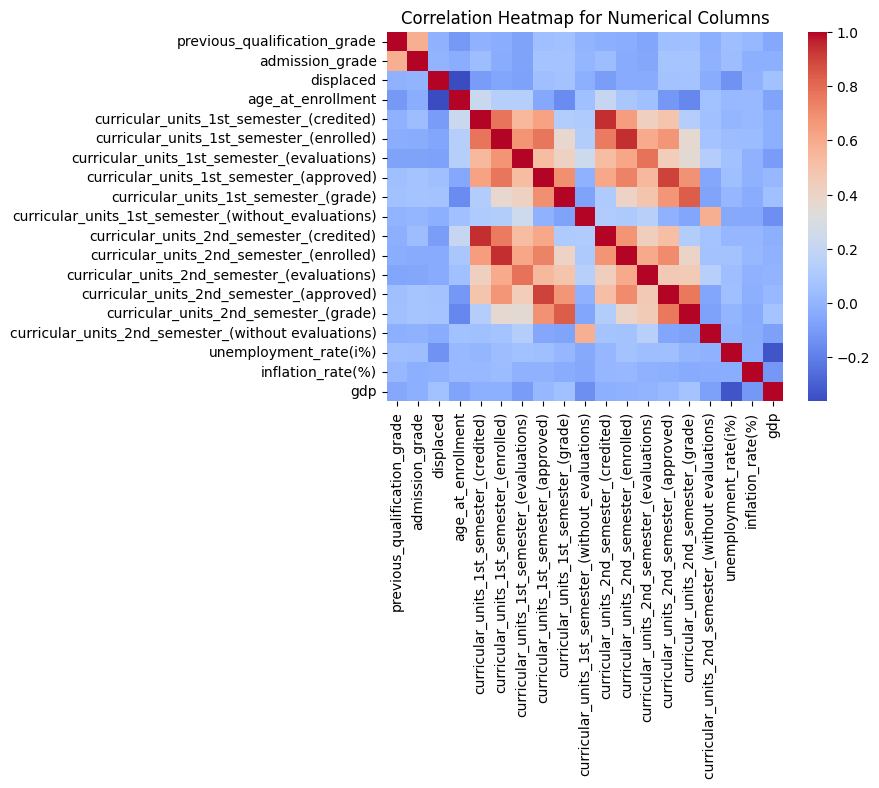

In [44]:
sns.heatmap(df[numerical_columns].corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

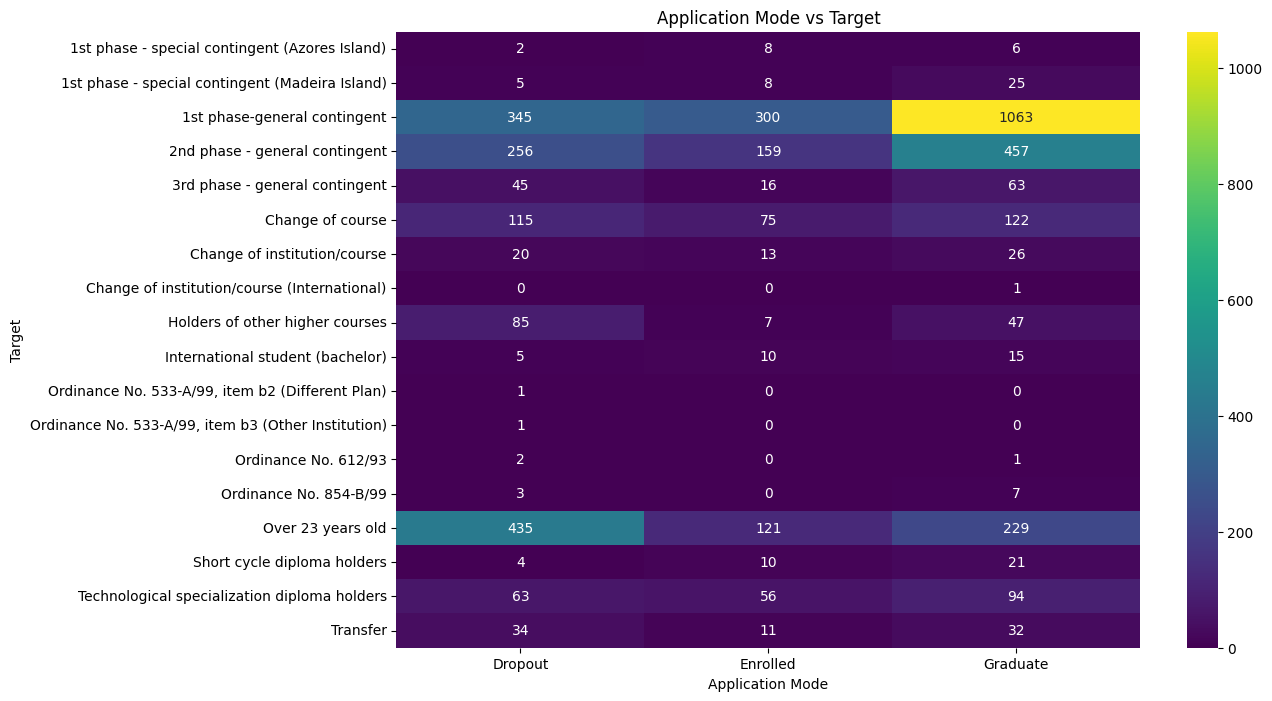

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(df["application_mode"], df["target"]), annot=True, cmap='viridis', fmt="d")
plt.title('Application Mode vs Target')
plt.xlabel('Application Mode')
plt.ylabel('Target')
plt.show()

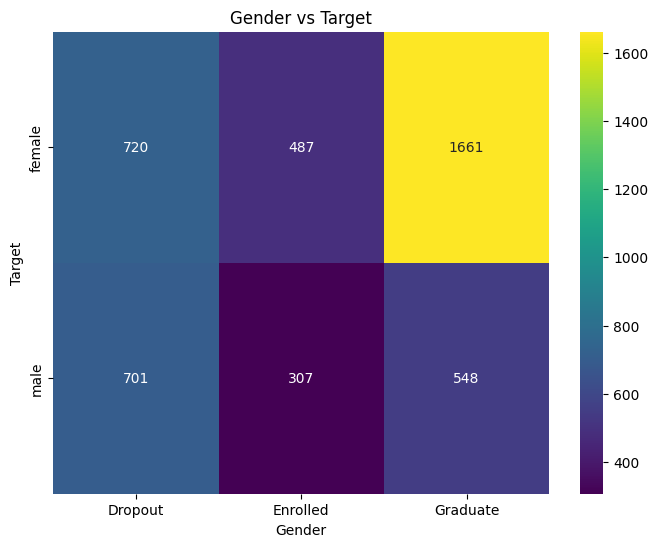

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df["gender"], df["target"]), annot=True, cmap='viridis', fmt="d")
plt.title('Gender vs Target')
plt.xlabel('Gender')
plt.ylabel('Target')
plt.show()

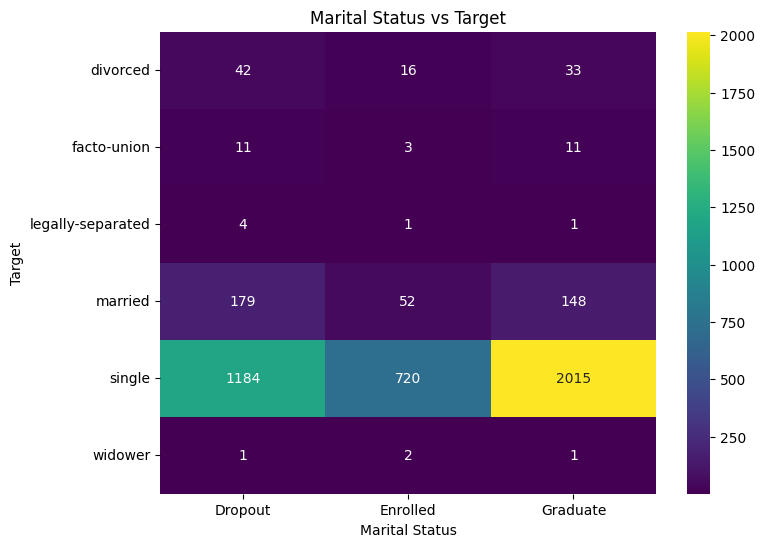

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df["marital_status"], df["target"]), annot=True, cmap='viridis', fmt="d")
plt.title('Marital Status vs Target')
plt.xlabel('Marital Status')
plt.ylabel('Target')
plt.show()

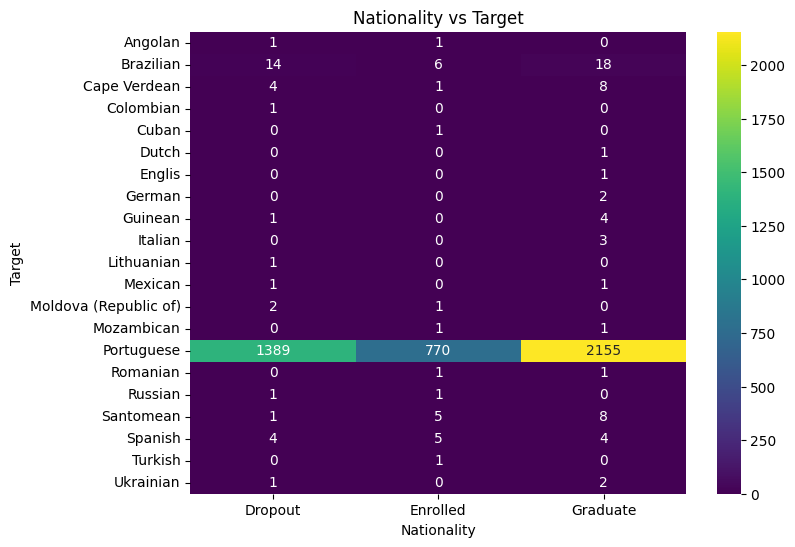

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(df["nationality"], df["target"]), annot=True, cmap='viridis', fmt="d")
plt.title('Nationality vs Target')
plt.xlabel('Nationality')
plt.ylabel('Target')
plt.show()

# KNN Model

### Text Preprocessing Column Names

In [49]:
dfc.columns=dfc.columns.str.lower()

In [50]:
dfc.columns=[col.lower().replace(' ', '_').replace('/', '').replace('\t', '').replace("'", "").replace("(", "").replace(")", "")
             for col in dfc.columns]

In [51]:
dfc.rename(columns={'nacionality': 'nationality'}, inplace=True)
dfc.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytimeevening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nationality', 'mothers_qualification',
       'fathers_qualification', 'mothers_occupation', 'fathers_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_with

### Split the Data

In [52]:
from sklearn.model_selection import train_test_split
X = dfc.drop('target',axis = 1)
y = dfc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3318, 36)
(1106, 36)
(3318,)
(1106,)


## Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train) , columns=std.get_feature_names_out())
X_train

marital_status  application_mode  application_order    course  \
0          -0.296188         -1.015013          -0.555852  0.182518   
1          -0.296188          1.323271          -0.555852 -0.416093   
2          -0.296188         -0.672825          -0.555852  0.124320   
3           1.375160         -1.015013          -0.555852  0.107692   
4          -0.296188          1.380302          -0.555852  0.107692   
...              ...               ...                ...       ...   
3313       -0.296188         -1.015013          -0.555852  0.483291   
3314       -0.296188          1.152177          -0.555852  0.124320   
3315       -0.296188         -0.102512          -0.555852  0.138014   
3316       -0.296188         -1.015013           0.196010  0.444166   
3317       -0.296188         -0.102512          -0.555852  0.182518   

      daytimeevening_attendance  previous_qualification  \
0                      0.349947               -0.353514   
1                     -2.857577               -0.353514   
2                      0.349947               -0.157646   
3                      0.349947               -0.353514   
4                      0.349947               -0.353514   
...                         ...                     ...   
3313                   0.349947               -0.353514   
3314                   0.349947               -0.157646   
3315                   0.349947               -0.353514   
3316                   0.349947               -0.353514   
3317                   0.349947               -0.353514   

      previous_qualification_grade  nationality  mothers_qualification  \
0                         2.616120    -0.134603              -0.039168   
1                        -0.958433    -0.134603               1.116600   
2                         1.323196    -0.134603              -1.066517   
3                         0.486599    -0.134603              -0.039168   
4                        -0.197890    -0.134603              -0.039168   
...                            ...          ...                    ...   
3313                      0.334490    -0.134603               1.116600   
3314                     -0.197890    -0.134603              -1.194936   
3315                     -1.338705    -0.134603              -0.039168   
3316                      0.714762    -0.134603               1.180809   
3317                     -0.806325    -0.134603              -1.066517   

      fathers_qualification  ...  \
0                 -0.196733  ...   
1                  1.039308  ...   
2                 -1.302664  ...   
3                 -0.196733  ...   
4                  1.039308  ...   
...                     ...  ...   
3313               0.974253  ...   
3314               1.039308  ...   
3315               0.974253  ...   
3316               1.039308  ...   
3317              -1.367718  ...   

      curricular_units_1st_sem_without_evaluations  \
0                                        -0.202517   
1                                         1.152225   
2                                        -0.202517   
3                                        -0.202517   
4                                        -0.202517   
...                                            ...   
3313                                     -0.202517   
3314                                      3.861708   
3315                                     -0.202517   
3316                                     -0.202517   
3317                                     -0.202517   

      curricular_units_2nd_sem_credited  curricular_units_2nd_sem_enrolled  \
0                             -0.279354                          -0.097372   
1                              2.367408                           0.360897   
2                             -0.279354                          -0.555641   
3                             -0.279354                          -0.555641   
4                             -0.279354                          -0.555641   
...  

In [87]:
std = StandardScaler()
std.fit(X_test)
X_test = pd.DataFrame(std.transform(X_test) , columns=std.get_feature_names_out())
X_test

marital_status  application_mode  application_order    course  \
0          -0.291190         -0.997828          -0.549263  0.315315   
1          -0.291190         -0.997828           1.034791  0.191611   
2           1.303146          1.195974          -0.549263 -4.089378   
3           6.086152         -0.651438          -0.549263  0.315315   
4          -0.291190          1.426901          -0.549263  0.444212   
...              ...               ...                ...       ...   
1101       -0.291190          1.195974          -0.549263  0.135425   
1102       -0.291190         -0.074122          -0.549263  0.191611   
1103       -0.291190         -0.997828           0.242764  0.341755   
1104       -0.291190         -0.074122           1.826818  0.315315   
1105       -0.291190         -0.997828           0.242764  0.119372   

      daytimeevening_attendance  previous_qualification  \
0                      0.350489               -0.340416   
1                      0.350489               -0.340416   
2                      0.350489                0.735020   
3                      0.350489                3.472493   
4                      0.350489               -0.340416   
...                         ...                     ...   
1101                   0.350489               -0.340416   
1102                   0.350489               -0.340416   
1103                   0.350489               -0.340416   
1104                   0.350489               -0.340416   
1105                   0.350489               -0.340416   

      previous_qualification_grade  nationality  mothers_qualification  \
0                        -0.725304    -0.100002               1.121151   
1                        -0.650122    -0.100002              -0.026636   
2                        -1.702663    -0.100002               1.121151   
3                         1.304595    -0.100002               1.121151   
4                        -0.875667    -0.100002              -1.174424   
...                            ...          ...                    ...   
1101                     -1.702663    -0.100002               1.121151   
1102                     -0.048671    -0.100002              -1.174424   
1103                      0.703144    -0.100002              -1.174424   
1104                      1.154232    -0.100002              -1.046892   
1105                     -0.199034    -0.100002               1.121151   

      fathers_qualification  ...  \
0                  0.917623  ...   
1                 -1.446865  ...   
2                  0.917623  ...   
3                  0.917623  ...   
4                 -1.446865  ...   
...                     ...  ...   
1101               0.917623  ...   
1102              -0.264621  ...   
1103              -0.264621  ...   
1104              -0.264621  ...   
1105              -0.264621  ...   

      curricular_units_1st_sem_without_evaluations  \
0                                         1.719731   
1                                        -0.195700   
2                                        -0.195700   
3                                        -0.195700   
4                                        -0.195700   
...                                            ...   
1101                                     -0.195700   
1102                                     -0.195700   
1103                                     -0.195700   
1104                                     -0.195700   
1105                                     -0.195700   

      curricular_units_2nd_sem_credited  curricular_units_2nd_sem_enrolled  \
0                             -0.291626                           0.317177   
1                             -0.291626                          -0.577715   
2                             -0.291626                          -2.814946   
3                              0.207659                           0.764623   
4                             -0.291626                          -0.130269   
...  

## Model Building

In [88]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,r2_score,f1_score
from sklearn.model_selection import KFold,cross_val_score

In [96]:
k_value=[]
test_acc=[]
train_acc=[]

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.75,random_state=13)

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    knn.fit(X_train,y_train)

    y_pred=knn.predict(X_test.values)
    y_pred_train=knn.predict(X_train.values)

    k_value.append(i)
    acc_test=accuracy_score(y_test,y_pred)
    acc_train=accuracy_score(y_train,y_pred_train)

    test_acc.append(acc_test)
    train_acc.append(acc_train)

df1=pd.DataFrame({'K':k_value,'Test Acc':test_acc,'Train Acc':train_acc})
df1


K  Test Acc  Train Acc
0    1  0.608499   1.000000
1    2  0.589512   0.833032
2    3  0.666365   0.802291
3    4  0.659132   0.777577
4    5  0.662749   0.758288
5    6  0.676311   0.742315
6    7  0.677215   0.729355
7    8  0.679024   0.725437
8    9  0.683544   0.719108
9   10  0.679928   0.708258
10  11  0.680832   0.711573
11  12  0.680832   0.708861
12  13  0.684448   0.709765
13  14  0.693490   0.709464
14  15  0.698011   0.704943
15  16  0.691682   0.698915
16  17  0.698011   0.698614
17  18  0.694394   0.693189
18  19  0.704340   0.691380

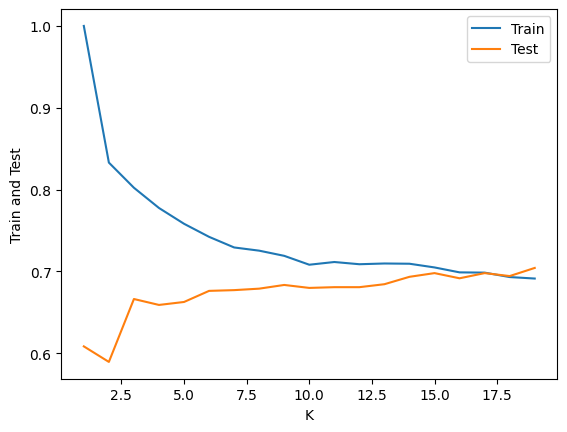

In [90]:
plt.plot(df1['K'], df1['Train Acc'],label='Train')
plt.xlabel('K')
plt.ylabel('Train and Test')

plt.plot(df1['K'], df1['Test Acc'],label='Test')
plt.xlabel('K')
plt.ylabel('Train and Test')

plt.legend()

plt.show()

In [91]:
k_value=[]
val_acc=[]

for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i,p=1,metric='minkowski')
    k_fold=KFold(n_splits=5,shuffle=True,random_state=20)
    cr_val_acc=cross_val_score(knn,X,y,cv=k_fold,scoring='accuracy')
    k_value.append(i)
    val_acc.append(cr_val_acc.mean())

df2=pd.DataFrame({'K':k_value,'Valid Acc':val_acc})

df2

K  Valid Acc
0    1   0.609177
1    2   0.574141
2    3   0.639919
3    4   0.637207
4    5   0.647377
5    6   0.649865
6    7   0.652125
7    8   0.657776
8    9   0.663427
9   10   0.662975
10  11   0.661393
11  12   0.664332
12  13   0.662295
13  14   0.664331
14  15   0.664557
15  16   0.665913
16  17   0.664328
17  18   0.664783
18  19   0.667043

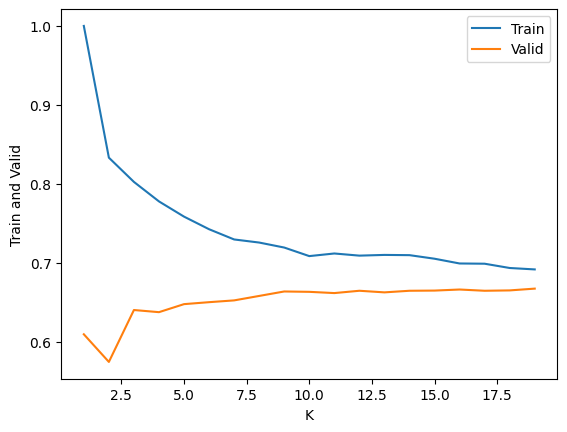

In [92]:
plt.plot(df1['K'], df1['Train Acc'],label='Train')
plt.xlabel('K')
plt.ylabel('Train and Valid')

plt.plot(df2['K'], df2['Valid Acc'],label='Valid')
plt.xlabel('K')
plt.ylabel('Train and Valid')

plt.legend()

plt.show()

## **Model Evaluation**

In [93]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[181,  21, 130],
       [ 45,  19, 128],
       [ 55,  23, 504]])

In [94]:
pd.Series({"Accuracy Score":accuracy_score(y_test,y_pred),
              'Precision Score':precision_score(y_test,y_pred,average="weighted"),
              "Recall Score":recall_score(y_test,y_pred,average='weighted'),
             "F1 Score":f1_score(y_test,y_pred,average='weighted')})

Accuracy Score     0.636528
Precision Score    0.593761
Recall Score       0.636528
F1 Score           0.597803
dtype: float64

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.64      0.55      0.59       332
    Enrolled       0.30      0.10      0.15       192
    Graduate       0.66      0.87      0.75       582

    accuracy                           0.64      1106
   macro avg       0.54      0.50      0.50      1106
weighted avg       0.59      0.64      0.60      1106

